# CNN Augmentation

In [3]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


## Visualize Images

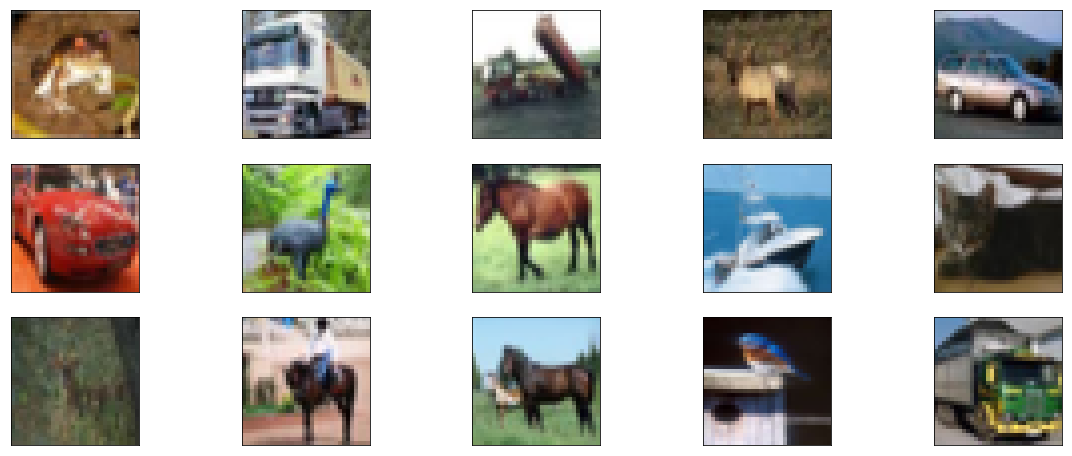

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,8))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i])

## Preprocess Data

### normalize the image

In [6]:
x_train = x_train.astype(dtype=np.float)/255
x_test = x_test.astype(dtype=np.float)/255

### one hot encode labels

In [7]:
import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### split training data into 90% training and 10% validation data

In [32]:
x_train, x_valid = x_train[:int(len(x_train)*.9)],x_train[int(len(x_train)*.9):]

In [37]:
y_train, y_valid = y_train[:int(len(y_train)*.9)],y_train[int(len(y_train)*.9):]

## Examine Data

In [38]:
x_train.shape

(45000, 32, 32, 3)

In [39]:
x_train[0]

array([[[ 0.23137255,  0.24313725,  0.24705882],
        [ 0.16862745,  0.18039216,  0.17647059],
        [ 0.19607843,  0.18823529,  0.16862745],
        ..., 
        [ 0.61960784,  0.51764706,  0.42352941],
        [ 0.59607843,  0.49019608,  0.4       ],
        [ 0.58039216,  0.48627451,  0.40392157]],

       [[ 0.0627451 ,  0.07843137,  0.07843137],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.07058824,  0.03137255,  0.        ],
        ..., 
        [ 0.48235294,  0.34509804,  0.21568627],
        [ 0.46666667,  0.3254902 ,  0.19607843],
        [ 0.47843137,  0.34117647,  0.22352941]],

       [[ 0.09803922,  0.09411765,  0.08235294],
        [ 0.0627451 ,  0.02745098,  0.        ],
        [ 0.19215686,  0.10588235,  0.03137255],
        ..., 
        [ 0.4627451 ,  0.32941176,  0.19607843],
        [ 0.47058824,  0.32941176,  0.19607843],
        [ 0.42745098,  0.28627451,  0.16470588]],

       ..., 
       [[ 0.81568627,  0.66666667,  0.37647059],
        

In [40]:
x_valid.shape

(5000, 32, 32, 3)

In [41]:
x_valid[0]

array([[[ 0.29411765,  0.19607843,  0.12156863],
        [ 0.26666667,  0.17647059,  0.12941176],
        [ 0.30588235,  0.22745098,  0.17647059],
        ..., 
        [ 0.36078431,  0.2627451 ,  0.2       ],
        [ 0.41176471,  0.33333333,  0.28627451],
        [ 0.54901961,  0.4627451 ,  0.45882353]],

       [[ 0.27058824,  0.19215686,  0.1254902 ],
        [ 0.23921569,  0.15686275,  0.11372549],
        [ 0.26666667,  0.18823529,  0.1372549 ],
        ..., 
        [ 0.30588235,  0.21176471,  0.14117647],
        [ 0.36862745,  0.29411765,  0.23529412],
        [ 0.4627451 ,  0.37647059,  0.36470588]],

       [[ 0.24705882,  0.18039216,  0.1254902 ],
        [ 0.28627451,  0.21176471,  0.17254902],
        [ 0.30588235,  0.22352941,  0.17254902],
        ..., 
        [ 0.44705882,  0.35686275,  0.2745098 ],
        [ 0.38039216,  0.30588235,  0.23921569],
        [ 0.45098039,  0.36862745,  0.34509804]],

       ..., 
       [[ 0.87843137,  0.74117647,  0.64313725],
        

In [42]:
y_train.shape

(45000, 10)

In [43]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [44]:
y_valid.shape

(5000, 10)

In [45]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

## Image Augmentation with ImageDataGenerator

In [50]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, 
                               zoom_range=[.1,.9], horizontal_flip = True, 
                               vertical_flip = True)
train_gen.fit(x_train)

valid_gen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, 
                               zoom_range=[.1,.9], horizontal_flip = True, 
                               vertical_flip = True)

valid_gen.fit(x_valid)

## CNN Model
* input layer
* hidden conv layer - relu
* maxpool
* hidden conv layer - relu
* maxpool
* hidden conv layer - relu
* maxpool
* hidden conv layer - relu
* maxpool
* flatten
* dense - relu
* dense - softmax

In [58]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=256,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 128)         32896     
__________

## Compiling the model

In [52]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## Training the Model

### using checkpoint

In [53]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='cnn.aug.weights.best.hdf5',verbose=1,save_best_only=True)
callbacks = [checkpoint]

## hyperparameters

In [54]:
epochs = 1
batch_size = 32

In [55]:
model.fit_generator(train_gen.flow(x_train,y_train,batch_size=batch_size),
                    validation_data=valid_gen.flow(x_valid,y_valid,batch_size=batch_size),
                    steps_per_epoch = len(x_train)/batch_size, epochs=epochs,
                    callbacks=callbacks,shuffle=True)

Epoch 1/1
1407/1406 [==============================] - 67s 48ms/step - loss: 2.0014 - acc: 0.2524 - val_loss: 1.8854 - val_acc: 0.2962

Epoch 00001: val_loss improved from inf to 1.88543, saving model to cnn.aug.weights.best.hdf5
